In [25]:
root_path = "/home/katanovic/fluid_kinetic_class/"
phare_path = "/home/katanovic/PHARE/"
import os
import sys

phare_root = os.path.expanduser(phare_path)
sys.path.append(os.path.join(phare_path, "pyphare"))
sys.path.append(os.path.join(root_path, "2024"))

import matplotlib.pyplot as plt
import numpy as np
from numpy import polyfit
from pyphare.pharesee.hierarchy import fromh5  # was get_times_from_h5
from pyphare.pharesee.run import Run
from scipy.ndimage import gaussian_filter1d as gf
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
import scipy as sc

sys.path.append("/home/katanovic/fluid_kinetic_class/2024/nb")

from get_get import *
from plot_plot import *


%matplotlib widget

root_path = "/home/katanovic/fluid_kinetic_class/2024/run/beam/"
from scripts import dist_plot

In [26]:
path = root_path + "ib1"
r = Run(path)

In [27]:
num = 2
mode, times = modes_E(path, num)
imax = find_peaks(mode)[0][0]
ioffset = 100
p, c = curve_fit(yaebx, times[:imax-ioffset], mode[:imax-ioffset],p0=[0.08,0.09])
ampli, gamma = p
a = mode
b = yaebx(times, ampli, gamma)
diff = a-b
for i in range(diff.size):
    if np.abs(diff[i]) > 0.5:
        break

In [28]:
dumped_mode = damped_mode = mode[:i] * yaebx(
        times[:i], 1 / ampli, -gamma)
omegas = np.fabs(np.fft.fft(damped_mode).real)
omega = (
    0.5
    * (omegas[1 : (omegas.size // 2)+1].argmax() + 1)
    * 2
    * np.pi
    / times[i-1]
)
k = 2*np.pi*num/(r.GetDomainSize()[0])
v_phase = omega/k
print(omega, k, v_phase)

0.11061945963344343 1.9634954084936207 0.056338028169014086


/tmp/ipykernel_3521222/1621132745.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1,1)


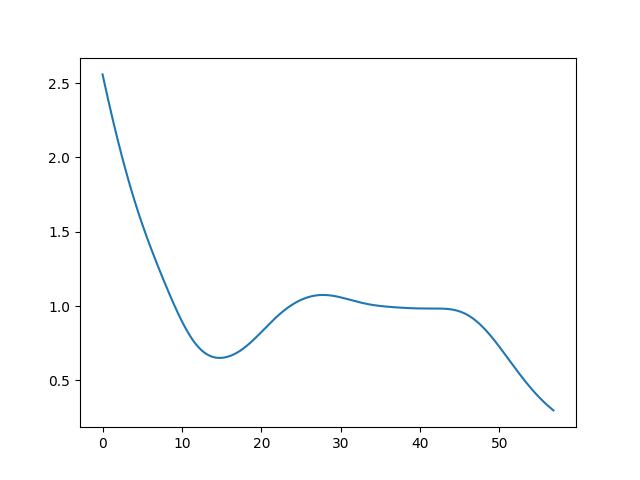

In [29]:
fig, ax = plt.subplots(1,1)
ax.plot(times[:i], dumped_mode)

/opt/conda/envs/hpc/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/opt/conda/envs/hpc/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/conda/envs/hpc/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/conda/envs/hpc/lib/python3.10/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


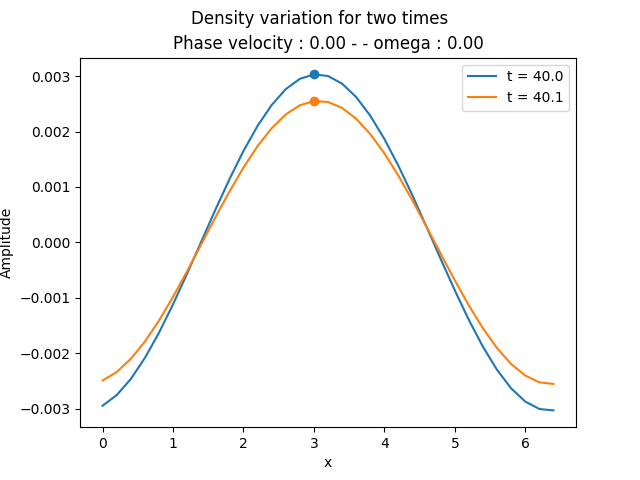

In [6]:
time = np.asarray([40,40.1])
dt = 0.1
fs, x, energy = fourier_series(r, time, 1, field="E", direction="x")
x1 = find_peaks(fs[:,0])[0][0]
x2 = find_peaks(fs[:,1])[0][0]
dx = x[x2]-x[x1]
v = dx/dt
k = 2*np.pi/r.GetDomainSize()[0]
w = k*v
fig, ax = plt.subplots(1,1)
fig.suptitle("Density variation for two times")
ax.plot(x, fs[:,0], label =f"t = {time[0]}")
ax.plot(x, fs[:,1], label=f"t = {time[1]}")
ax.set_title(f"Phase velocity : {v:.2f} - - omega : {w :.2f}")
ax.set_ylabel("Amplitude")
ax.set_xlabel("x")
ax.scatter(x[x1], fs[x1, 0])
ax.scatter(x[x2], fs[x2, 1])
ax.legend()

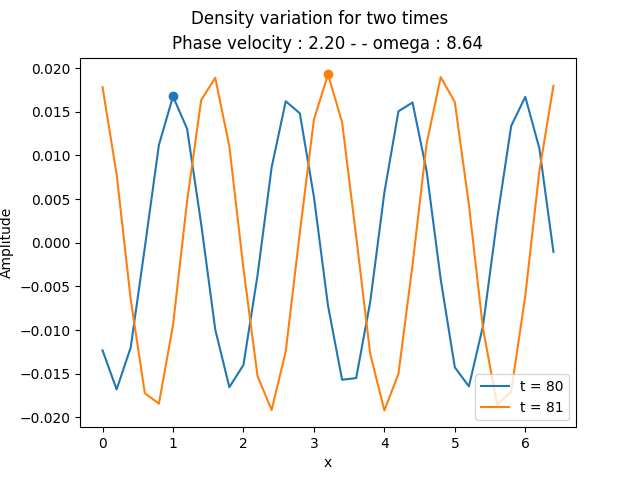

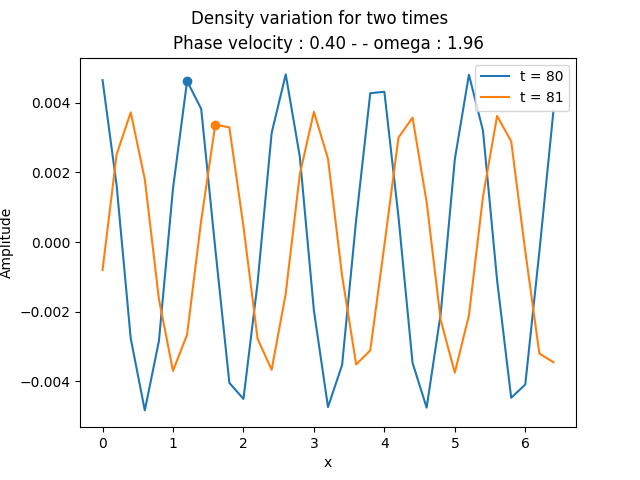

In [17]:
time = np.asarray([80,81])
dt = 1
Omega = np.array([])
z = np.arange(4,6, 1)
for i in z:
    fs, x, energy = fourier_series(r, time, i, field="E", direction="x")
    x1 = find_peaks(fs[:,0])[0][0]
    x2 = find_peaks(fs[:,1])[0][1]
    dx = x[x2]-x[x1]
    v = dx/dt
    k = 2*np.pi*i/r.GetDomainSize()[0]
    w = k*v
    Omega = np.append(Omega, w)
    fig, ax = plt.subplots(1,1)
    fig.suptitle("Density variation for two times")
    ax.plot(x, fs[:,0], label =f"t = {time[0]}")
    ax.plot(x, fs[:,1], label=f"t = {time[1]}")
    ax.set_title(f"Phase velocity : {v:.2f} - - omega : {w :.2f}")
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("x")
    ax.scatter(x[x1], fs[x1, 0])
    ax.scatter(x[x2], fs[x2, 1])
    ax.legend()

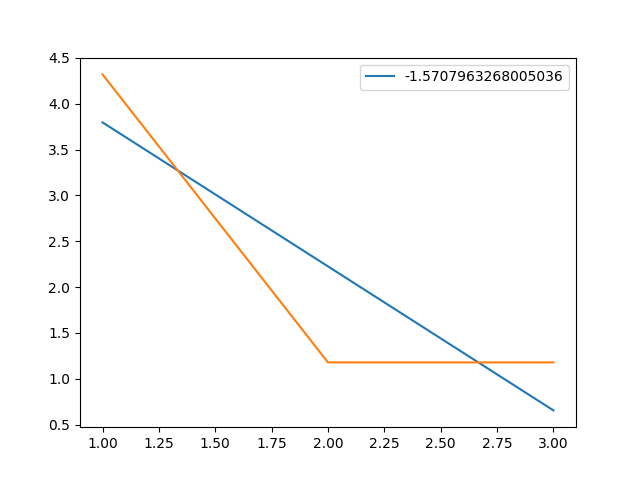

In [8]:
p, c = curve_fit(yax, z, Omega)
a, b = p


fig, ax = plt.subplots(1,1)
ax.plot(z, yax(z, a, b), label=f"{a}")
ax.plot(z, Omega)
ax.legend()

In [9]:
time = np.asarray([40,41])
dt = 0.1
fs, x, energy = fourier_series(r, time, 1, field="E", direction="x")
x1 = find_peaks(fs[:,0])[0][0]
x2 = find_peaks(fs[:,1])[0][0]
dx = x[x2]-x[x1]
v = dx/dt
k = 2*np.pi/r.GetDomainSize()[0]
w = k*v
fig, ax = plt.subplots(1,1)
fig.suptitle("Density variation for two times")
ax.plot(x, fs[:,0], label =f"t = {time[0]}")
ax.plot(x, fs[:,1], label=f"t = {time[1]}")
ax.set_title(f"Phase velocity : {v:.2f} - - omega : {w :.2f}")
ax.set_ylabel("Amplitude")
ax.set_xlabel("x")
ax.scatter(x[x1], fs[x1, 0])
ax.scatter(x[x2], fs[x2, 1])
ax.legend()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
file = os.path.join(r.path, "EM_B.h5")
times = fromh5.get_times_from_h5(file)
dt = times[1] - times[0]

In [ ]:
ex, ey, ez, x = get_E(r, times, sigma = 0)
z = 16

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
ax.plot(times, ey[z,:])

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
ax.plot(times, ey[z,:])
ex_w = np.fft.fft(ey[z,:])
T = np.array([])
all = np.zeros_like(ex_w, dtype=complex)
for i in range(0, 500):
    mode_indice = i
    ex_w_6 = np.zeros_like(ex_w, dtype= complex)
    ex_w_6[mode_indice] = ex_w[mode_indice]
    ex_w_6[-mode_indice] = ex_w[-mode_indice]
    ex_6 = np.fft.ifft(ex_w_6)
    all += ex_6
    #a = find_peaks(ex_6)[0][0]
    #b = find_peaks(ex_6)[0][1]
    #T=np.append(T,(times[b]-times[a]))
    ax.plot(times, ex_6)
ax.plot(times, all, c="black", ls="--")

In [ ]:
n = np.arange(2, 80, 1)
k = 2*np.pi*n/(r.GetDomainSize()[0])
o = 2*np.pi/T

p, c = curve_fit(yax, k, o)
a, b = p

fig, ax = plt.subplots(1,1)
ax.plot(k, o)
#ax.plot(k, yax(k, a, b), label=f"{a}")
ax.legend()

In [ ]:
mode_indice = 2
ex_k_6 = np.zeros_like(ex_k, dtype= complex)

ex_k_6[mode_indice,:] = ex_k[mode_indice,:]
ex_k_6[-mode_indice, :] = ex_k[-mode_indice, :]

ex_6 = np.fft.ifft(ex_k_6, axis = 0)

energie_total = np.sum(ex.real**2/2)
energie_mode = np.sum(ex_6.real**2/2)
rate = energie_mode*100/energie_total

In [ ]:
mode = 6
time = [10]
fs1, x, energy = fourier_series(r, time, mode, field="E", direction="x")
a = find_peaks(fs1[:,0])[0][0]

time = [11]
fs2, x, energy = fourier_series(r, time, mode, field="E", direction="x")
b = find_peaks(fs2[:,0])[0][0]

print((x[b]-x[a]))

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
ax.plot(x, fs1)
ax.plot(x, fs2)

In [ ]:
a = find_peaks

In [ ]:
num = 6
mode, times = modes_right(path, num)

In [ ]:
imax = find_peaks(mode)[0][0]

In [ ]:
p, c = curve_fit(yaebx, times[:imax-100], mode[:imax-100],p0=[0.08,0.09])
ampli, gamma = p

In [ ]:
a = mode
b = yaebx(times, ampli, gamma)
diff = a-b
for i in range(diff.size):
    if np.abs(diff[i]) > 0.025:
        break

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), constrained_layout=True)
ax.plot(times, mode, label=f"Mode #{num+1}", c="black")
ax.scatter(times[imax], mode[imax])
ax.set_title(f"Time end linear mode : {times[i]}")
ax.plot(times[:imax-50], yaebx(times[:imax-50],ampli, gamma), label=f"ampli = {ampli:.3f} ; gamma={gamma:.3f}", c="red", ls="-")
ax.axvline(times[i], ls="--")
ax.legend()
fig.suptitle("Evolution of the Different Modes Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")

In [ ]:
v = []
o = []

num = np.arange(1, 250, 1)
k = 2*np.pi*num/(r.GetDomainSize()[0])
for n in num:
    time = [10]
    fs, x, energy = fourier_series(r, time,mode = n, field='N')
    a = find_peaks(fs[:,0])[0][0]
    
    time = [10.1]
    fs, x, energy = fourier_series(r, time,mode = n, field='N')
    b = find_peaks(fs[:,0])[0][0]
    phase = np.abs((x[b]-x[a])/0.1)
    v.append(phase)
    omega = phase*k[n-1]
    o.append(omega)

In [ ]:
p, c = curve_fit(yax, k, o, bounds=([0, 0], [0.09, 0.00001]))
A, B = p
A = 2

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].plot(k,v)
ax[0].axhline(2)
ax[1].plot(k, yax(k, A, B), ls="--", c="red", label=f"{A:.3f}")
ax[1].plot(k, o)
ax[1].legend()

In [ ]:
fig, ax = plt.subplots(1,1)
ax.plot(x, fs, label="mode #1", c="red")

In [ ]:
time = [52.1, 80, 99]
bx, by, bz, x = get_B(r, time, sigma = 0)
fig, ax = plt.subplots(1,1)
fs, x, energy = fourier_series(r, time, 1, field="B", direction="y")
ax.plot(x, fs, label="mode #1", c="red")

fs, x, energy = fourier_series(r, time, 2, field="B", direction="y")
ax.plot(x, fs, label="mode #2", c="green")
ax.scatter(x, by[:,0], label="by", c="black", s = 5)
ax.scatter(x, by[:,1], label="by", c="black", s = 5)
ax.scatter(x, by[:,2], label="by", c="black", s = 5)
ax.legend()

In [ ]:
time = np.arange(1, 100, 1)
bx, by, bz, x = get_B(r, time, sigma = 0)
fig, ax = plt.subplots(1,1)
fs, x, energy = fourier_series(r, time, 1, field="B", direction="y")
a = []
for i in range(time.size):
    x1 = find_peaks(fs[:,i])[0][0]
    a.append(x[x1])
    ax.scatter(x[x1], fs[x1, i])
ax.plot(x, fs)

In [ ]:
b = []
for i in range(time.size-1):
    b.append(np.abs(a[i+1]-a[i]))
fig, ax = plt.subplots(1,1)
ax.axhline(0.57)
ax.plot(time[:-1], b)

In [ ]:
time = np.asarray([25, 26])
dt = 0.1
fs, x, energy = fourier_series(r, time, 1, field="E", direction="x")
x1 = find_peaks(fs[:,0])[0][0]
x2 = find_peaks(fs[:,1])[0][0]
dx = x[x2]-x[x1]
v = dx/dt

k = 2*np.pi/r.GetDomainSize()[0]
w = k*v
fig, ax = plt.subplots(1,1)

ax.plot(x, fs)
ax.set_title(f"Phase velocity : {v:.2f} - - omega : {w :.2f}")
ax.scatter(x[x1], fs[x1, 0])
ax.scatter(x[x2], fs[x2, 1])


In [ ]:
time = [25]
dt = 0.1
dx = []

for i in range(2, int(r.GetDomainSize()/(0.2*2)+1)):
    fs, x , energy = fourier_series(r, time, i, field="N")
    peaks = find_peaks(gf(fs[:,0], 1))[0]
    a = peaks[0]
    b = peaks[1]
    dx.append(x[b]-x[a])
dx = np.array(dx)
l = np.arange(2, int(r.GetDomainSize()/(0.2*2)+1), 1)
fig, ax = plt.subplots(1,1)
ax.plot((2*np.pi)/dx, (2*np.pi)/dx*v)
print((2*np.pi/dx[0]*v))
print(v)